In [14]:
import numpy as np
import matplotlib.pyplot as plt

## Filter requirements

In [15]:
# Filter requirements
fs = 1000                  # Sample rate, Hz
cutoff = 350               # Desired cutoff frequency, Hz
numtaps = 7                # Length of the FIR filter (N)
alpha=((numtaps-1)/2)
wc=2*(cutoff/fs)*np.pi     # Digital frequency, rad

## Calculating Filter Coefficients

In [16]:
def filter_coefficients(numtaps):
    
    tap=np.zeros(numtaps)
    for i in range(numtaps):
        
        if i != alpha:
            tap[i]=(0.5-0.5*np.cos(2*(i)*np.pi/(numtaps-1)))*(-(np.sin((i-alpha)*wc))/((i-alpha)*np.pi))
        else:
            tap[i]=(0.5-0.5*np.cos(2*(i)*np.pi/(numtaps-1)))*(1-(wc/np.pi))

    return tap
      
coeff=filter_coefficients(numtaps)
print(coeff)

[-0.          0.03784134 -0.19313858  0.3        -0.19313858  0.03784134
 -0.        ]


## Calculating Frequency Response of Designed Filter

# DTFT

In [17]:
w=np.linspace(0,np.pi,fs)
def DTFT(output_signal):
    length=len(output_signal)
    X_k=[]
    for k in range(len(w)):
        add=0
        for n in range(length):
            e=np.exp((-1j*w[k]*n))
            q=output_signal[n]*e
            add+= q
        X_k.append(add)
    return X_k

ff_spec=DTFT(coeff)

# Plotting the Frequency response of the Designed filter

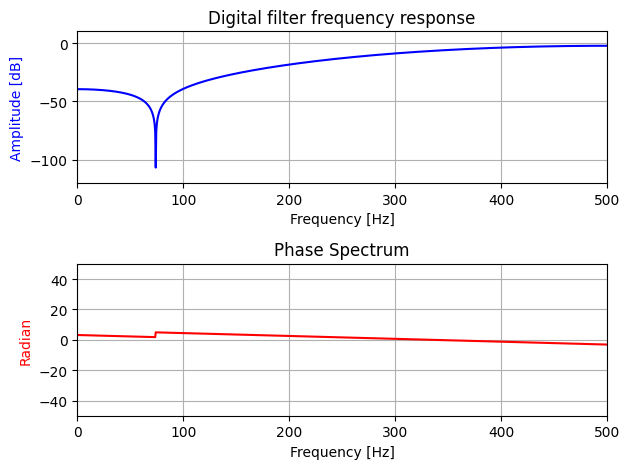

In [18]:
#Magnitude Response
fig, axs= plt.subplots(2)
axs[0].set_title('Digital filter frequency response')
axs[0].plot((0.5*fs*w)/np.pi, 20*np.log10(np.abs(ff_spec)), 'b')
axs[0].set_ylabel('Amplitude [dB]', color='b')
axs[0].set_xlabel('Frequency [Hz]')
axs[0].set_ylim([-120,10])
axs[0].set_xlim([0,0.5*fs])
axs[0].grid()
#Phase Response
angle=np.unwrap(np.angle(ff_spec))
axs[1].set_title('Phase Spectrum')
axs[1].plot((0.5*fs*w)/np.pi,angle, 'r')
axs[1].set_ylabel('Radian', color='r')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylim(-50,50)
axs[1].set_xlim([0,0.5*fs])
axs[1].grid()
plt.tight_layout()
plt.show()

## Generating Composite signal

In [59]:
#Define the parameters
duration = 1  # Duration of the signal in seconds
time = np.arange(0, duration,1/fs)  # Time array

# # Generate the composite signal
signal_250Hz = np.sin(2 * np.pi * 250 * time)
signal_400Hz = np.sin(2 * np.pi * 400 * time)
composite_signal = signal_250Hz + signal_400Hz

# Filtering the composite signal

In [62]:
def convolution(c,d):
    c_arr=c.reshape(1,len(c))
    d_trans=d.reshape(len(d),1)
    mat=np.matmul(d_trans,c_arr)
    output_seq=[]
    for i in range((len(c)+len(d))-1):
        add=0
        for j in range(len(c)):
            for k in range(len(d)):
                if(j+k)==i:
                 add+=mat[k][j]
        output_seq.append(add)
    return output_seq


input_signal = composite_signal
filter_kernel = coeff
filtered_signal = convolution(input_signal, filter_kernel)
filtered_signal1=np.convolve(input_signal, filter_kernel)
print(filtered_signal,filtered_signal1)

[0.0, 0.0, 0.06008391591381963, -0.34265183944528205, 0.6581691944349577, -0.604769249246678, 0.38045192211074363, -0.3737679513852036, 0.22431732713593444, 0.37376795138520347, -0.8290865763826122, 0.6047692492466783, -0.14945062424926983, 6.938893903907228e-17, 0.14945062424926964, -0.6047692492466783, 0.8290865763826125, -0.37376795138520325, -0.22431732713593508, 0.37376795138520397, -0.38045192211074363, 0.604769249246678, -0.5980852785211376, -2.0816681711721685e-17, 0.5980852785211366, -0.6047692492466762, 0.38045192211074363, -0.3737679513852063, 0.22431732713593894, 0.37376795138519914, -0.8290865763826096, 0.6047692492466767, -0.14945062424926864, -4.3021142204224816e-16, 0.14945062424927036, -0.6047692492466802, 0.8290865763826163, -0.37376795138521013, -0.22431732713592695, 0.37376795138519836, -0.38045192211074225, 0.6047692492466783, -0.5980852785211372, -5.48172618408671e-16, 0.5980852785211366, -0.6047692492466767, 0.38045192211074486, -0.37376795138520486, 0.2243173271

In [21]:
def FFT(output_signal):
    length=len(output_signal)
    X_k=[]
    for k in range(length):
        add=0
        for n in range(length):
            e=np.exp((-1j*2*np.pi*k*n)/length)
            q=output_signal[n]*e
            add+= q
        X_k.append(add)
    return X_k

composite_sig=FFT(composite_signal)
composite_mag=np.abs(composite_sig)
freq = np.arange(0,fs/2,1)

In [22]:
def FFT(output_signal):
    N=1000
    length=len(output_signal)
    X_k=[]
    for k in range(N):
        add=0
        for n in range(length):
            e=np.exp((-1j*2*np.pi*k*n)/N)
            q=output_signal[n]*e
            add+= q
        X_k.append(add)
    return X_k

filter_spec=FFT(filtered_signal)
filtered_mag=np.abs(filter_spec)
freq = np.arange(0,fs/2,1)

# Time Domain Representation of Signals(Generated and Filtered signal)

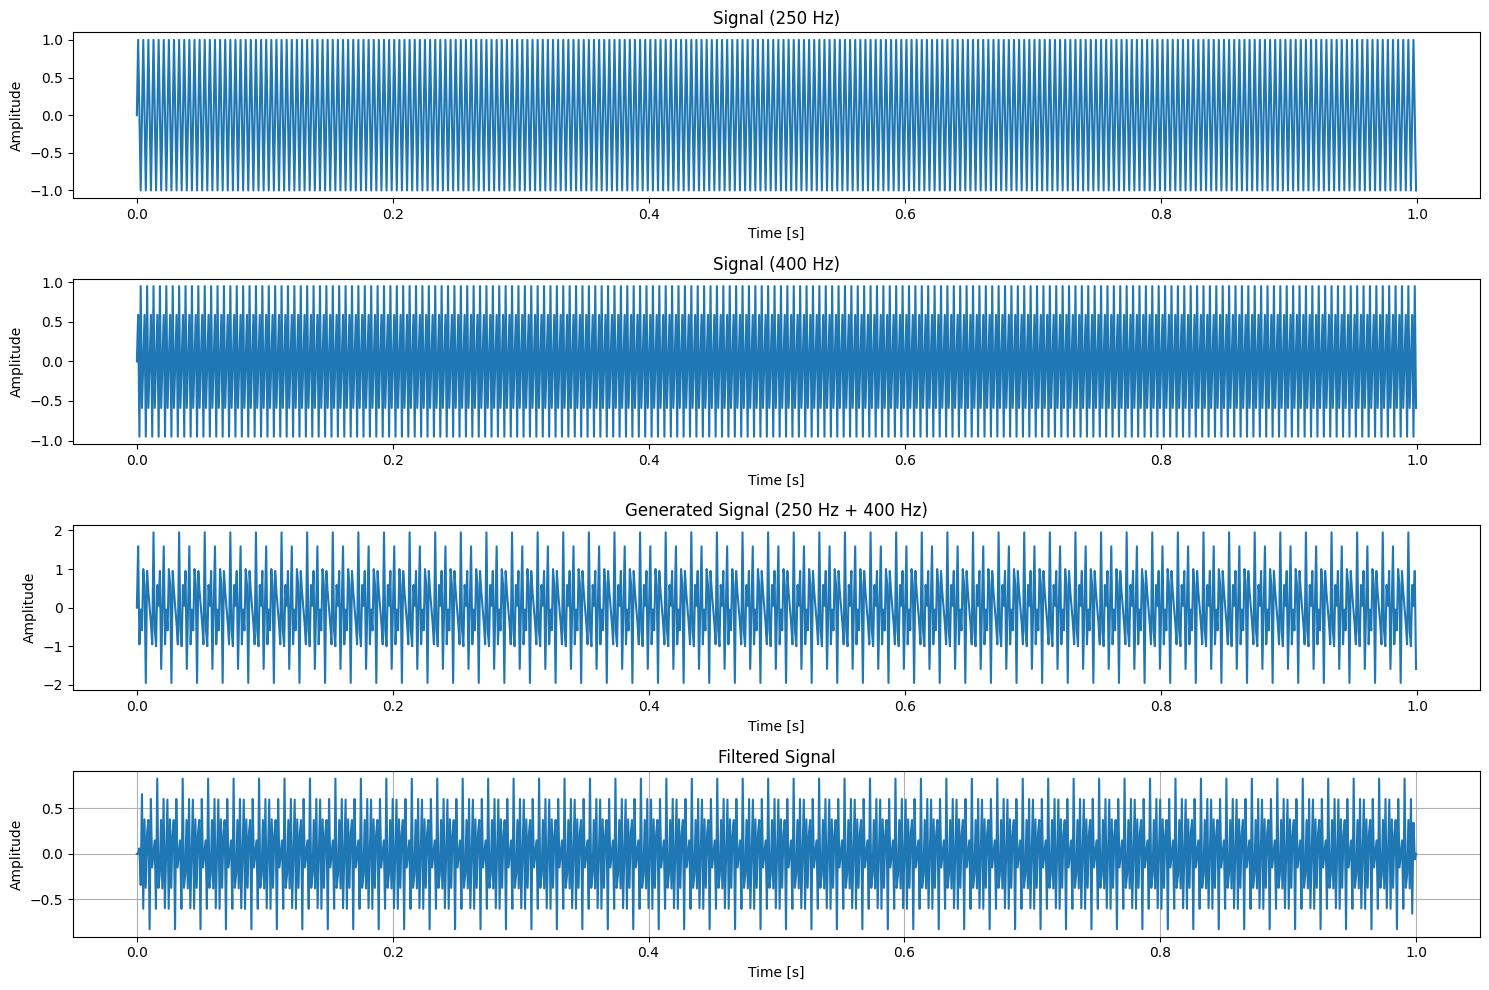

In [23]:
time1 = np.arange(0, duration, 1/(len(filtered_signal)-1))
fig, axs = plt.subplots(4,figsize=(15,10))
axs[0].plot(time, signal_250Hz)
axs[0].set_title('Signal (250 Hz)')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')
axs[1].plot(time, signal_400Hz)
axs[1].set_title('Signal (400 Hz)')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Amplitude')
axs[2].plot(time, composite_signal)
axs[2].set_title('Generated Signal (250 Hz + 400 Hz)')
axs[2].set_xlabel('Time [s]')
axs[2].set_ylabel('Amplitude')
axs[3].plot(time1, filtered_signal)
axs[3].set_title('Filtered Signal')
axs[3].set_xlabel('Time [s]')
axs[3].set_ylabel('Amplitude')
axs[3].grid(True)
plt.tight_layout()
plt.show()

# Frequency Domain Representation of Signals(Generated and Filtered signal)

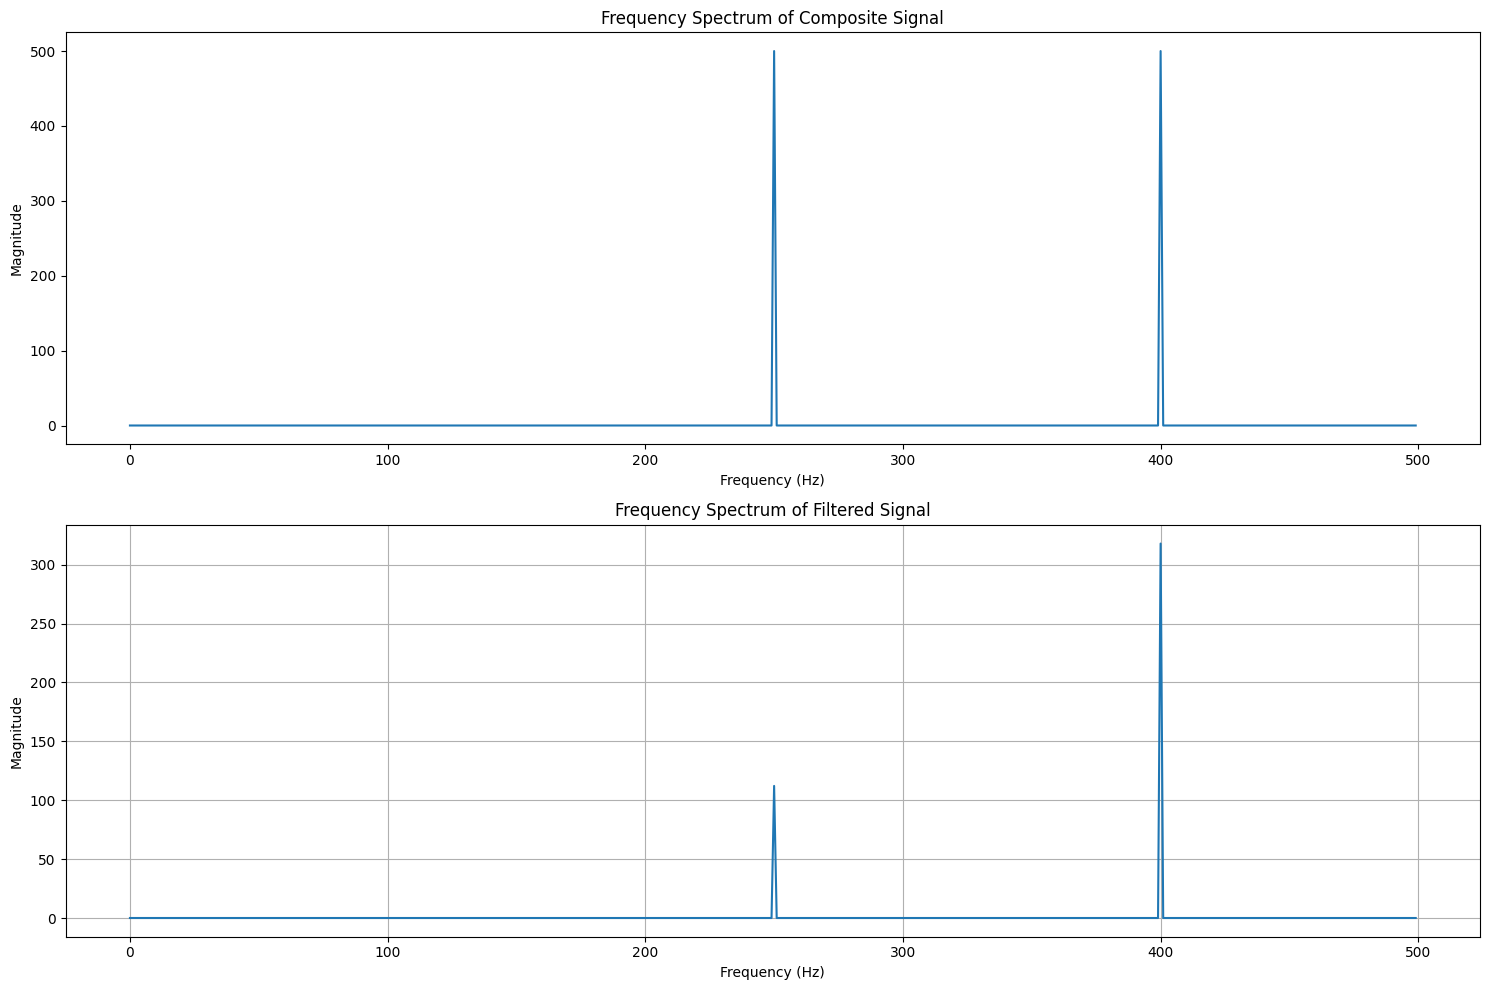

In [24]:
fig, axs = plt.subplots(2,figsize=(15,10))
axs[0].plot(freq, composite_mag[:len(freq)])
axs[0].set_title('Frequency Spectrum of Composite Signal')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Magnitude')
axs[1].plot(freq, filtered_mag[:len(freq)])
axs[1].set_title('Frequency Spectrum of Filtered Signal')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude')
axs[1].grid(True)
plt.tight_layout()
plt.show()


# Using Inbuilt Functions

In [25]:
from scipy.signal import firwin, freqz
#Compute the frequency response of the filter
filter_coefficients=firwin(numtaps, cutoff, window='hann',pass_zero=False, fs=fs)
f, c = freqz((filter_coefficients), 1, worN=2000)
print(filter_coefficients)
print(coeff)

[-0.          0.04966316 -0.25347607  0.39372154 -0.25347607  0.04966316
 -0.        ]
[-0.          0.03784134 -0.19313858  0.3        -0.19313858  0.03784134
 -0.        ]


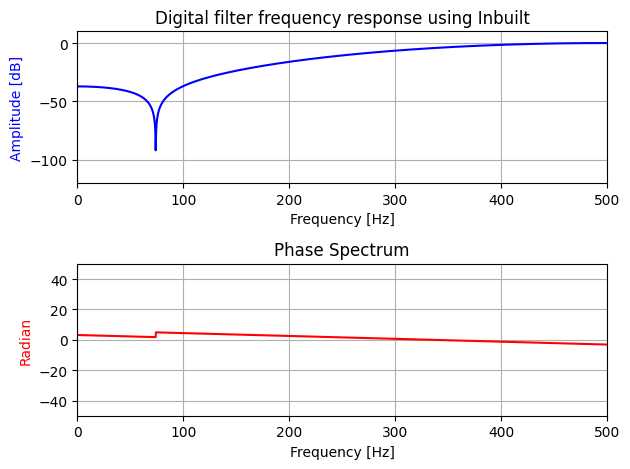

In [26]:
# Plot the frequency response of the Designed filter
fig, axs= plt.subplots(2)
axs[0].set_title('Digital filter frequency response using Inbuilt')
axs[0].plot((0.5*fs*f)/np.pi, 20*np.log10(np.abs(c)), 'b')
axs[0].set_ylabel('Amplitude [dB]', color='b')
axs[0].set_xlabel('Frequency [Hz]')
axs[0].set_ylim([-120,10])
axs[0].set_xlim([0,0.5*fs])
axs[0].grid()

angle=np.unwrap(np.angle(c))
axs[1].set_title('Phase Spectrum')
axs[1].plot((f*0.5*fs)/np.pi,angle, 'r')
axs[1].set_ylabel('Radian', color='r')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylim(-50,50)
axs[1].set_xlim([0,0.5*fs])
axs[1].grid()
plt.tight_layout()
plt.show()

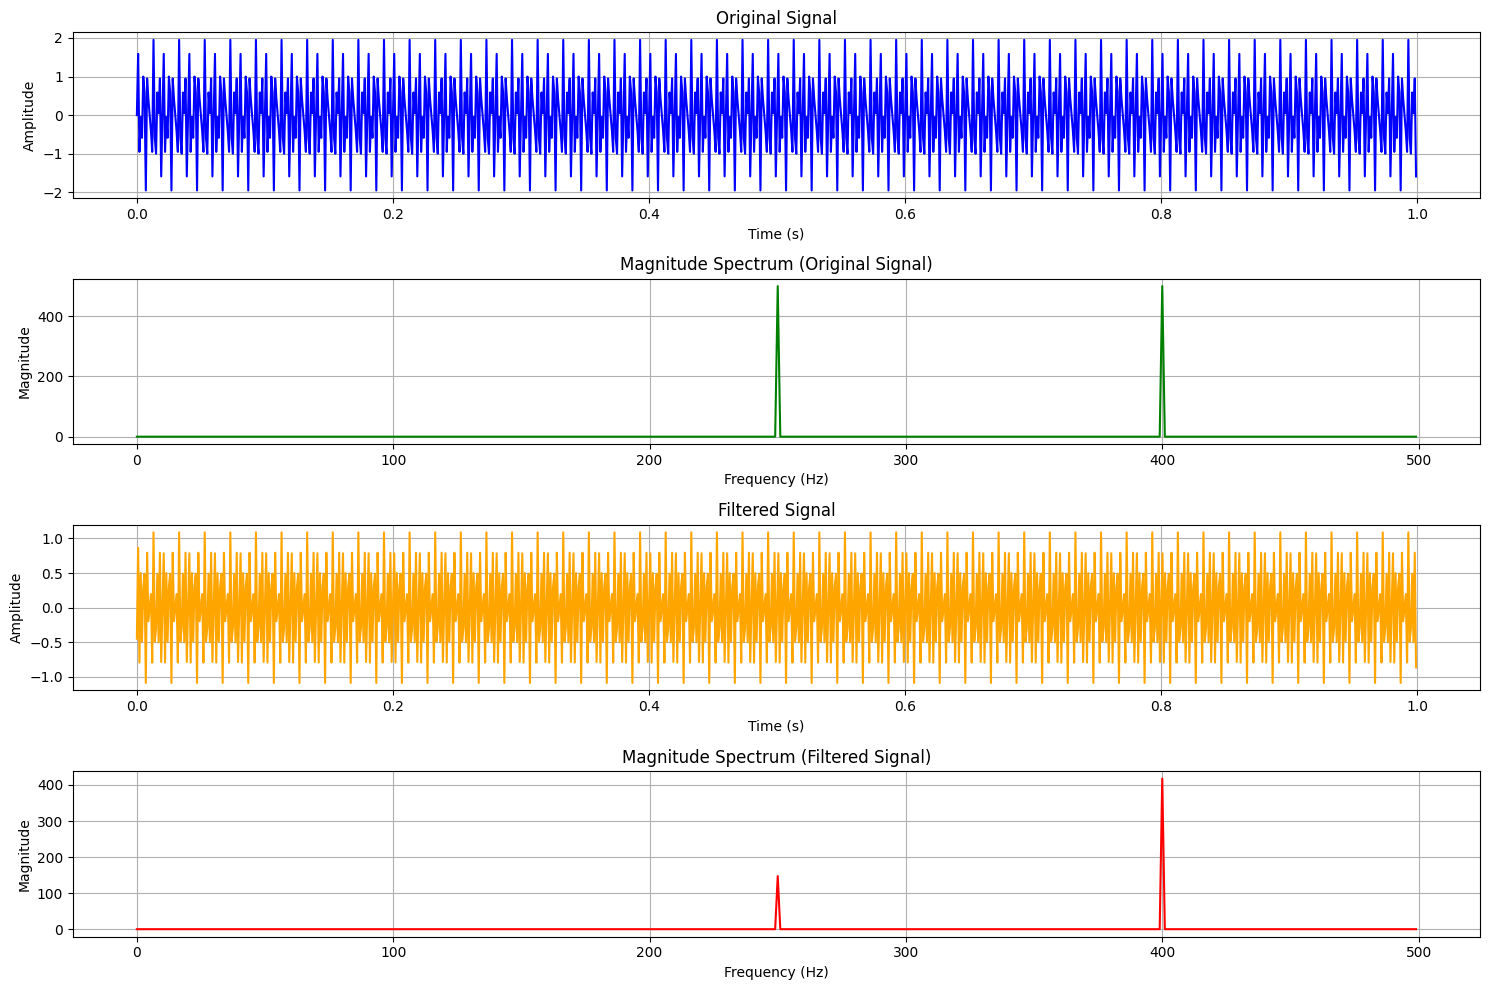

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
fs = 1000  # Sampling frequency in Hz
duration = 1  # Duration of the signal in seconds
time = np.arange(0, duration, 1/fs)  # Time array

# Generate the composite signal
signal_250Hz = np.sin(2 * np.pi * 250 * time)
signal_400Hz = np.sin(2 * np.pi * 400 * time)
composite_signal = signal_250Hz + signal_400Hz

# Define the filter coefficients
filter_coeffs = filter_coefficients

# Filter the composite signal using convolution
filtered_signal = np.convolve(composite_signal, filter_coeffs, mode='same')

# Compute FFT of the original and filtered signals
fft_original = np.fft.fft(composite_signal)
fft_filtered = np.fft.fft(filtered_signal)

# Frequency axis
freq = np.fft.fftfreq(len(composite_signal), d=1/fs)

# Calculate the magnitude spectrum
magnitude_spectrum_original = np.abs(fft_original)
magnitude_spectrum_filtered = np.abs(fft_filtered)

# Plot the original and filtered signals as separate subplots
fig, axs = plt.subplots(4, figsize=(15, 10))

# Plot original signal and its spectrum
axs[0].plot(time, composite_signal, color='blue')
axs[0].set_title('Original Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

axs[1].plot(freq[:500], magnitude_spectrum_original[:len(freq)//2], color='green')
axs[1].set_title('Magnitude Spectrum (Original Signal)')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude')
axs[1].grid(True)

# Plot filtered signal and its spectrum
axs[2].plot(time, filtered_signal, color='orange')
axs[2].set_title('Filtered Signal')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
axs[2].grid(True)

axs[3].plot(freq[:500], magnitude_spectrum_filtered[:len(freq)//2], color='red')
axs[3].set_title('Magnitude Spectrum (Filtered Signal)')
axs[3].set_xlabel('Frequency (Hz)')
axs[3].set_ylabel('Magnitude')
axs[3].grid(True)

plt.tight_layout()
plt.show()
